In [3]:
from IH_main import *


In [4]:
# Initializing current version of Insert Halo without actually running the main calculation
# To run the actual calculation the idle_run parameter should be set to False (the default is True for now for 
# development purposes)





cone_angle = 6.0
zlens = .5

#IH = run_insert_halo(zlens = zlens, zsource = 2.0, DM_type = "CDM", Mhost = 13.3, geometry_shape = "CYLINDER", cone_angle_arcsec = cone_angle)

In [5]:
# Printing the expected number of subhalo per area at a redshift defined by zlens multiplied by the area at that redshift
# to get the expected number of subhalos at that lens plane
#print(f"Expected number of subhalos for a geometry angle of {cone_angle} arcsec at a redshift of {zlens} is \
    #{IH.GM.integrated_subhalo_mass_function() * IH.GM.lens_plane_area():.2f}")


In [6]:
# Replicating the same result by running pyHalo with the same parameters and finding the length of the list of the number
# of generated subhalos when the generation randomization is off (draw_poisson = False).

#from pyHalo.PresetModels.cdm import CDM


#sashimi_values = IH.SH.sh_settings
#cdm = CDM(z_lens = zlens, z_source = 2.0, subhalo_spatial_distribution = "UNIFORM", cone_opening_angle_arcsec = cone_angle, 
#          kwargs_cosmo = {"H0": sashimi_values.h*100, "Om0": sashimi_values.OmegaM, "Ob0": sashimi_values.OmegaB},
#          host_scaling_factor=0.88, redshift_scaling_factor=1.7, draw_poisson = False, geometry_type = "CYLINDER")

#print(f"Number of generated pyHalo subhalos: {len(cdm.subhalos)}")


In [99]:
SDG = run_insert_halo(zlens = zlens, zsource = 2.0, DM_type = "CDM", Mhost = 13.3, geometry_shape = "CYLINDER", cone_angle_arcsec = cone_angle,
                      seed = None, idle_run = False, randomization = True)



Running Sashimi-CDM


Calculating subhalo properties: 100%|█████████| 128/128 [00:53<00:00,  2.41it/s]


In [103]:
print(np.max(SDG.SH.S_m_z0))
print(np.min(SDG.SH.S_m_z0))

print(len(SDG.SH.S_m_z0))
print(SDG.calc_Nsub())



4448109046.696378
104594.87453590904
3619
3619


In [93]:
#N = 10

#max_mass = []

#for i in range(N):
#    SDG = run_insert_halo(zlens = zlens, zsource = 2.0, DM_type = "CDM", Mhost = 13.3, geometry_shape = "CYLINDER", cone_angle_arcsec = cone_angle,
#                      seed = None, idle_run = False, randomization = True)
#    max_mass.append(np.max(SDG.SH.S_m_z0))


In [14]:
print(np.max(SDG.SH.ma200))

9944019599.792807


3619
3619


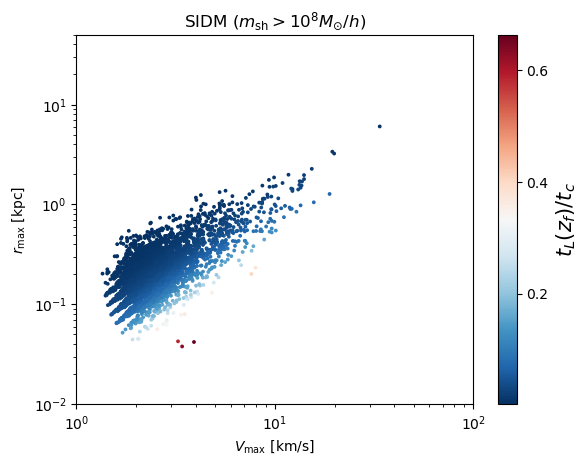

In [105]:
import matplotlib.pyplot as plt


SH = SDG.SH
sh = SDG.SH.sh_settings

mth = 1.e8*sh.Msun/sh.h
mth = 0
condition = (SH.S_m_z0>mth)

q1 = SH.S_VmaxSIDM_z0[condition]/(sh.km/sh.s)
q2 = SH.S_rmaxSIDM_z0[condition]/sh.kpc
c = SH.S_tt_ratio[condition]


logVmax = q1
logrmax = q2

print(len(logVmax))
print(len(logrmax))
c = np.minimum(c,1.)

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e0,1e2)
plt.ylim(1e-2,5e1)
plt.xlabel(r'$V_{\rm max} \ [\mathrm{km/s}]$')
plt.ylabel(r'$r_{\rm max} \ [\mathrm{kpc}]$')
plt.title(r'SIDM ($m_{\rm sh}>10^{8}M_{\odot}/h$)')
plt.scatter(logVmax,logrmax,c=c,s=3,cmap='RdBu_r')
cbar = plt.colorbar(ticks=np.arange(1,-0.1,-0.2))
cbar.set_label(r'$t_L(z_f)/t_c$',fontsize=15)
plt.show()
